EEE 598
HW2
Problem 7a

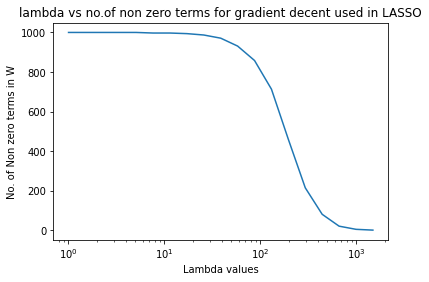

In [6]:
# Problem 7a

import numpy as np
from matplotlib import pyplot as plt

######Create synthetic data and calculate lambda max################### 

# initialize n,d,k,sigma
n = 500
d = 1000
k = 100
sigma = 1

#Generate random x values
x = np.random.normal(0,1,size=(n,d))

#Generate w_j(the true distribution)
w_j = np.arange(1,d+1)
w_j = w_j/k
w_j[k:d] = 0
w_j = np.reshape(w_j,(1000,1))

#Find the true lables
y = np.dot(x,w_j) + np.random.normal(0,1,size=(n,1))

lambda_max = np.max(2*np.absolute(np.dot(np.transpose(x),y-np.mean(y))))

###################Synthetic data generated and lambda max calculated###########

############# Perform gradient decent to solve LASSO#################

# Calculate value of a
a = np.sum(x*x,0).reshape(d,1)
a = 2*a

#Initialize list to keep track of values of lambda and no. of non zero values
lamd = []
cout = []

# For the maximum value of lambda, the w matrix will be zero
w_k = np.zeros(d)

#Loop for iterating through each value of lambda
while lambda_max > 1:

  #Find the number of non zeros in the  w matrix
    count = 0

    #check for convergence
    for r in range(len(w_k)):
      if w_k[r] != 0:
        count = count + 1
    #Update lambda value and the count of non zero values
    lamd.append(lambda_max)
    cout.append(count)

    #Assign a value for the difference
    diff = 1

    #loop for checking if the values of w have converged or not
    while diff >= 0.0001:
      
      #Find b
      b = 0
      b = (np.sum(y - np.dot(x,w_k))) / n

      #Store the old value of w so that we can check later
      w_old = w_k

      # Loop from 1 to d
      for k in range(d):
        x0 = np.delete(x,k,1)
        w0 = np.delete(w_k,k,0)

        #Find c values
        c_k = 2*np.sum(np.dot(np.transpose(x[:,k]),(y - (b + np.sum(np.dot(x0,w0).reshape(500,1))))))

        # Check for the condition to input the value of w
        if c_k < -lambda_max:
          w_k[k] = (c_k+lambda_max) / a[k]
        elif c_k >= -lambda_max and c_k <= lambda_max:
          w_k[k] = 0
        elif c_k > lambda_max:
          w_k[k] = (c_k-lambda_max) / a[k]

      #Find the difference between the current and the previous weights  
      diff = np.sum(np.absolute(w_old - w_k))
    #Decrease lambda once values of weights converge
    lambda_max = lambda_max / 1.5

############ Done with computing the converged w for each lambda ##############
# for i in range(len(lamd)):
#   lamd[i] = 1/lamd[i]


############# Plot the graph ############################
plt.plot(lamd,cout)
plt.xlabel("Lambda values")
plt.ylabel("No. of Non zero terms in W")
plt.xscale('log')
plt.title("lambda vs no.of non zero terms for gradient decent used in LASSO")
plt.show()

############# Done with plotting #######################


EEE598
HW2
Problem 7b

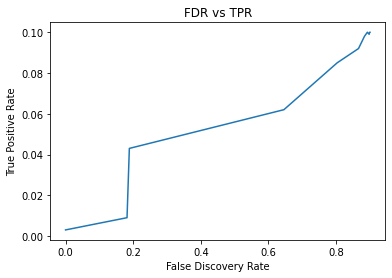

In [7]:
# Problem 7b

import numpy as np
from matplotlib import pyplot as plt

######Create synthetic data and calculate lambda max################### 

# initialize n,d,k,sigma
n = 500
d = 1000
k = 100
sigma = 1

#Generate random x values
x = np.random.normal(0,1,size=(n,d))

#Generate w_j(the true distribution)
w_j = np.arange(1,d+1)
w_j = w_j/k
w_j[k:d] = 0
w_j = np.reshape(w_j,(1000,1))

#Find the true lables
y = np.dot(x,w_j) + np.random.normal(0,1,size=(n,1))

lambda_max = np.max(2*np.absolute(np.dot(np.transpose(x),y-np.mean(y))))

###################Synthetic data generated and lambda max calculated###########



############# Perform gradient decent to solve LASSO#################

# Calculate value of a
a = np.sum(x*x,0).reshape(d,1)
a = 2*a

#Initialize list to keep track of values of lambda and no. of non zero values
lamd = []
cout = []

# For the maximum value of lambda, the w matrix will be zero
w_k = np.zeros(d)

FDR =[]
TPR = []

#Loop for iterating through each value of lambda
while lambda_max > 0.1:

  #Find the number of non zeros in the  w matrix
    count = 0

    #check for convergence
    for r in range(len(w_k)):
      if w_k[r] != 0:
        count = count + 1
    #Update lambda value and the count of non zero values
    lamd.append(lambda_max)
    cout.append(count)

    #Assign a value for the difference
    diff = 1

    #loop for checking if the values of w have converged or not
    while diff >= 0.01:
      
      #Find b
      b = 0
      b = (np.sum(y - np.dot(x,w_k))) / n

      #Store the old value of w so that we can check later
      w_old = w_k

      # Loop from 1 to d
      for k in range(d):
        x0 = np.delete(x,k,1)
        w0 = np.delete(w_k,k,0)

        #Find c values
        c_k = 2*np.sum(np.dot(np.transpose(x[:,k]),(y - (b + np.sum(np.dot(x0,w0).reshape(500,1))))))

        # Check for the condition to input the value of w
        if c_k < -lambda_max:
          w_k[k] = (c_k+lambda_max) / a[k]
        elif c_k >= -lambda_max and c_k <= lambda_max:
          w_k[k] = 0
        elif c_k > lambda_max:
          w_k[k] = (c_k-lambda_max) / a[k]

      #Find the difference between the current and the previous weights  
      diff = np.sum(np.absolute(w_old - w_k))
    #Decrease lambda once values of weights converge
    lambda_max = lambda_max / 1.5

    tot = 0
    fd = 0
    tp = 0
    for j in range(len(w_k)):
      if w_k[j] != 0:
        tot = tot+1
      if j >= 100:
        if w_k[j] != 0:
          fd = fd + 1
      else:
        if w_k[j] != 0:
          tp = tp + 1
    FDR.append(fd/tot)
    TPR.append(tp/k)



############# Done with computing the converged w for each lambda ##############


############# Plot the graph ############################
# plt.plot(lamd,cout)
# plt.xlabel("Lambda values")
# plt.ylabel("No. of Non zero terms in W")
# plt.xscale('log')
# plt.title("lambda vs no.of non zero terms for gradient decent used in LASSO")
# plt.show()

plt.plot(FDR,TPR)
plt.xlabel("False Discovery Rate")
plt.ylabel("True Positive Rate")
plt.title("FDR vs TPR")
plt.show()
############# Done with plotting #######################


    